In [1]:
import pandas as pd
import numpy as np
import FundInfo as fi
import seaborn as sns

Tickers Reference: https://www.tsx.com/listings/listing-with-us/sector-and-product-profiles/exchange-traded-funds

In [2]:
# read data
rootDir = "../"
fundInfo = fi.FundInfo(rootDir)

In [3]:
fundInfoDF = fundInfo.allFundInfoDF
#data overview
print("Total tickers : %d "%len(fundInfoDF["Ticker"]))
print("\nTotal Fund Families : %d "%len(fundInfoDF["Fund_Family"].unique()))
print("\nTicker by Fund Families : \n%s "%(fundInfoDF["Fund_Family"].value_counts()))

Total tickers : 99 

Total Fund Families : 6 

Ticker by Fund Families : 
BlackRock/iShares    60
Blackrock/iShares    23
AGFiQ                 9
Accelerate            4
Arrow Capital         2
Barclays Capital      1
Name: Fund_Family, dtype: int64 


In [4]:
selectedColumns = ["Ticker", "Fund_Family", "previous_close", "stocks", "bonds",
                   "priceearnings", "pricebook", "pricesales", "pricecashflow"]
dataDF = fundInfoDF.loc[:, selectedColumns]
dataDF = dataDF.dropna(subset=['previous_close'])

In [5]:
dataDF["Fund_Family"] = dataDF["Fund_Family"].str.lower()
dataDF[["stocks", "bonds"]] = dataDF[["stocks", "bonds"]].replace("%", "", regex=True).astype(float)
dataDF

,Ticker,Fund_Family,previous_close,stocks,bonds,priceearnings,pricebook,pricesales,pricecashflow
0,HDGE,accelerate,17.55,100.00,0.0,13.75,2.51,1.42,10.20
1,ARB,accelerate,21.82,100.00,0.0,0.00,1.95,0.95,9.36
2,ATSX,accelerate,21.11,99.99,0.0,13.60,1.63,0.97,6.85
3,ALFA,accelerate,14.19,100.00,0.0,8.09,1.27,0.48,4.31
4,QCD,agfiq,25.77,99.11,0.0,14.15,1.68,1.15,7.33
...,...,...,...,...,...,...,...,...,...
92,COW,blackrock/ishares,38.00,99.74,0.0,17.58,1.68,0.48,7.96
93,XHC,blackrock/ishares,55.52,98.62,0.0,24.40,4.15,1.99,15.57
96,CGR,blackrock/ishares,26.95,99.48,0.0,15.62,1.31,5.32,14.17
97,CWW,blackrock/ishares,39.35,98.87,0.0,24.51,2.69,1.60,10.68


Text(0.5, 1.0, 'Fund Composition')

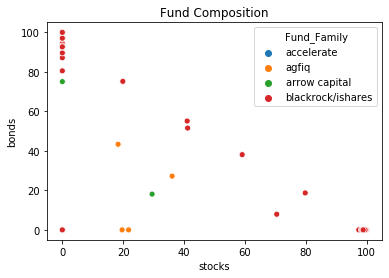

In [6]:
ax = sns.scatterplot(data=dataDF, x="stocks", y="bonds", hue="Fund_Family")
ax.set_title("Fund Composition")